In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

In [77]:
!pip install imbalanced-learn


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

In [79]:
data = pd.read_csv("creditcard_fraud.csv")

In [80]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [81]:
pd.options.display.max_columns = None

In [82]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [83]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,'0'


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [85]:
data.shape

(284807, 31)

In [86]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


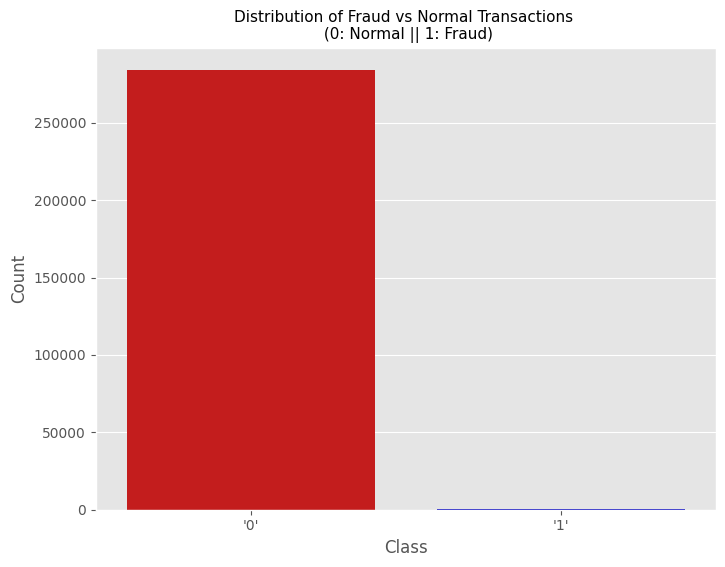

In [87]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [92]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,'0'


In [93]:
data = data.drop(['Time'], axis =1)

In [94]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,'0'


In [95]:
data.duplicated().any()

True

In [96]:
data = data.drop_duplicates()

In [97]:

data.shape

(275663, 30)

In [98]:
# Check the shape
X_train.shape

(220530, 29)

In [99]:
data['Class'].value_counts()

Class
'0'    275190
'1'       473
Name: count, dtype: int64

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

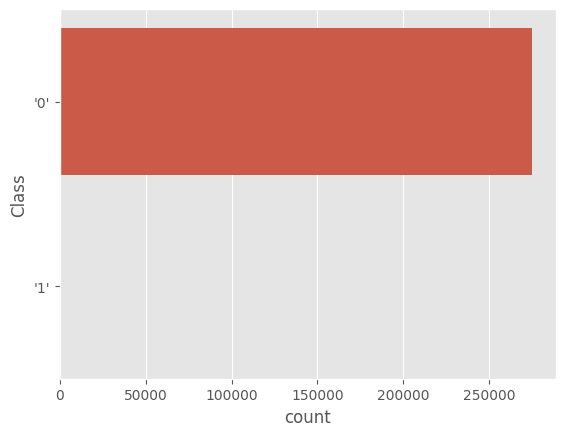

In [101]:
sns.countplot(data['Class'])
plt.show()

In [102]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [105]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [110]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary containing the classifiers
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Function to clean and convert labels
def clean_label(label):
    # Remove non-numeric characters (quotes, spaces) and convert to integer
    return int(re.sub(r"[^0-9]", "", label))

for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    
    # Fitting the classifier to the training data
    clf.fit(X_train, y_train)
    
    # Making predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Clean both y_test and y_pred to remove quotes and ensure they are integers
    y_test_clean = [clean_label(label) for label in y_test]
    y_pred_clean = [clean_label(pred) for pred in y_pred]

    # Calculating metrics
    print(f"\nAccuracy: {accuracy_score(y_test_clean, y_pred_clean)}")
    print(f"Precision: {precision_score(y_test_clean, y_pred_clean, average='macro')}")
    print(f"Recall: {recall_score(y_test_clean, y_pred_clean, average='macro')}")
    print(f"F1 Score: {f1_score(y_test_clean, y_pred_clean, average='macro')}")



==========Logistic Regression===========

Accuracy: 0.9992563437505668
Precision: 0.9450037963736404
Recall: 0.8131232253811376
F1 Score: 0.8675557597157824

==========Decision Tree Classifier===========

Accuracy: 0.9988391707325921
Precision: 0.8128660334231125
Recall: 0.8677685092422929
F1 Score: 0.8380931090165382


In [111]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [115]:
print(data['Class'].unique())


["'0'" "'1'"]


In [116]:
print(data['Class'].value_counts())


Class
'0'    275190
'1'       473
Name: count, dtype: int64


In [129]:
# Filter normal and fraud data based on 'Class' column, accounting for potential spaces
normal = data[data['Class'].str.strip() == '0']  # '0' as a string
fraud = data[data['Class'].str.strip() == '1']   # '1' as a string

# Print the shape of both datasets
print(f"Shape of Normal Data: {normal.shape}")
print(f"Shape of Fraud Data: {fraud.shape}")

# Optional: Display unique values again to verify filtering
print("Unique values in Class after stripping:", data['Class'].unique())


Shape of Normal Data: (0, 30)
Shape of Fraud Data: (0, 30)
Unique values in Class after stripping: ["'0'" "'1'"]


In [130]:
data['Class'] = data['Class'].str.strip()  # Remove spaces

# Optionally: Remove the quotes if they are causing issues
data['Class'] = data['Class'].str.replace("'", "")  # Remove single quotes

# Display cleaned DataFrame
print("\nCleaned DataFrame:")
print(data)

# Check unique values after cleaning
print("\nUnique values in Class after cleaning:")
print(data['Class'].unique())


Cleaned DataFrame:
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10       V11       V12       V13  \
0       0.239599  0.098698  0.36378

In [131]:
# Filter normal and fraud data based on 'Class' column, accounting for potential spaces
normal = data[data['Class'].str.strip() == '0']  # '0' as a string
fraud = data[data['Class'].str.strip() == '1']   # '1' as a string

# Print the shape of both datasets
print(f"Shape of Normal Data: {normal.shape}")
print(f"Shape of Fraud Data: {fraud.shape}")

# Optional: Display unique values again to verify filtering
print("Unique values in Class after stripping:", data['Class'].unique())


Shape of Normal Data: (275190, 30)
Shape of Fraud Data: (473, 30)
Unique values in Class after stripping: ['0' '1']


In [132]:
normal_sample = normal.sample(n=473)

In [133]:
normal_sample.shape

(473, 30)

In [134]:
new_data = pd.concat([normal_sample,fraud], ignore_index=True)

In [135]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.451403,1.075276,1.606799,-0.159225,0.073873,-0.545733,0.673402,0.022797,-0.808712,-0.173089,1.470747,1.177147,0.960074,0.136715,0.036296,0.347846,-0.702513,0.018937,0.297181,0.171265,-0.165258,-0.399220,-0.048245,0.337918,-0.189955,0.050488,0.268357,0.112867,-0.342914,0
1,1.075847,-0.160211,0.244757,0.794464,-0.303214,-0.368804,0.184632,-0.201779,0.299680,-0.275285,-0.895694,0.971884,1.302390,-0.322331,-0.298162,-0.182780,-0.216112,-0.683150,0.365861,0.177252,-0.190288,-0.527459,-0.151429,-0.043882,0.525554,0.285540,-0.033624,0.027749,0.071447,0
2,1.944814,-0.094660,-0.470449,1.438415,-0.018194,0.222860,-0.250280,0.046108,1.047666,-0.049153,-1.247755,1.110405,0.657736,-0.449175,-1.206744,-0.459201,-0.110026,-0.997664,0.194726,-0.212654,-0.523166,-1.197512,0.454870,0.539495,-0.270061,-1.131147,0.058186,-0.023166,-0.321645,0
3,1.253952,0.642739,-0.436756,0.953395,-0.076171,-1.652824,0.396487,-0.321328,-0.142153,-0.703913,0.432573,-0.201557,-0.458407,-1.215288,0.978635,0.470204,1.173387,0.197805,-0.487115,-0.100878,-0.136067,-0.351314,-0.039288,0.591228,0.516614,0.349726,-0.032301,0.045513,-0.350191,0
4,-4.325657,-3.242567,1.558943,-0.552980,-0.622998,-0.899430,0.079284,-0.212508,1.376827,0.362071,0.361148,-3.323010,1.912703,0.248542,-0.563460,1.553201,0.655831,-0.683714,-0.145809,-0.271427,-0.312874,0.810691,0.553011,0.417132,0.882402,-0.125324,0.645830,-0.555925,0.998124,0


In [136]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [137]:
X = new_data.drop('Class', axis = 1)
y= new_data['Class']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure that y_train and y_test are of type string
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Define classifiers
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Evaluate classifiers
for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Print evaluation metrics
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred, pos_label='1')}")
    print(f"\n Recall: {recall_score(y_test, y_pred, pos_label='1')}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred, pos_label='1')}")



==========Logistic Regression===========

 Accuracy: 0.9421052631578948

 Precision: 0.9690721649484536

 Recall: 0.9215686274509803

 F1 Score: 0.9447236180904522

==========Decision Tree Classifier===========

 Accuracy: 0.8631578947368421

 Precision: 0.8518518518518519

 Recall: 0.9019607843137255

 F1 Score: 0.8761904761904762


In [141]:
X = data.drop('Class', axis = 1)
y= data['Class']

In [142]:
X.shape

(275663, 29)

In [143]:
y.shape

(275663,)

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [146]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure that y_train and y_test are strings
y_train = y_train.astype(str)
y_test = y_test.astype(str)

# Define classifiers
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

# Evaluate classifiers
for name, clf in classifier.items():
    print(f"\n=========={name}===========")
    clf.fit(X_train, y_train)  # Train the classifier
    y_pred = clf.predict(X_test)  # Make predictions
    
    # Print evaluation metrics
    print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision: {precision_score(y_test, y_pred, pos_label='1')}")
    print(f"\n Recall: {recall_score(y_test, y_pred, pos_label='1')}")
    print(f"\n F1 Score: {f1_score(y_test, y_pred, pos_label='1')}")



==========Logistic Regression===========

 Accuracy: 0.9458465060503652

 Precision: 0.9732139411015477

 Recall: 0.9168590804137956

 F1 Score: 0.9441963658831128

==========Decision Tree Classifier===========

 Accuracy: 0.998210327410153

 Precision: 0.9973501760499474

 Recall: 0.999072777848481

 F1 Score: 0.9982107337808013


In [150]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [151]:
import joblib

In [152]:
joblib.dump(dtc, "credit_card_model.pkl")

['credit_card_model.pkl']

In [153]:
model = joblib.load("credit_card_model.pkl")

In [154]:
pred = model.predict([[]])

C:\Users\ARYAN REDDY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [166]:
pred[0]

'0'

In [164]:
if pred[0] == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Fraud Transaction
